In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.neural_network import MLPClassifier

In [2]:
AND = pd.DataFrame([[0,0,0],[0,1,0],[1,0,0],[1,1,1]], columns=['A','B','OUT'])
AND.head()

,A,B,OUT
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
XOR = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,0]], columns=['A','B','OUT'])
XOR.head()

,A,B,OUT
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

In [5]:
V = [[1,-1],[1,1]]
W =[1,1]

learning_rate = 0.05
iter = 0
error = 0  
errors = []

while iter < 1000 and error > 0.02 or error == 0:
  error = 0
  for index,row in AND.iterrows():
    input_hidden = []
    hidden_out = []
    input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
    input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])
    hidden_out.append(sigmoid(input_hidden[0]))
    hidden_out.append(sigmoid(input_hidden[1]))
    output = sigmoid(hidden_out[0]*W[0]+(hidden_out[1]*W[1]))
    ERROR = row['OUT'] - output
    delta1 = ((ERROR) * output *(1-output))
    delta2 = [delta1*W[0]*hidden_out[0]*(1-hidden_out[0]),delta1*W[1]*hidden_out[1]*(1-hidden_out[1])]
    for i in range(len(W)):
      W[i] += learning_rate*delta1*hidden_out[i]
    print(V)
    V[0][0] += learning_rate*delta2[0]*row['A'] 
    V[0][1] += learning_rate*delta2[1]*row['A']
    V[1][0] += learning_rate*delta2[0]*row['B']
    V[1][1] += learning_rate*delta2[1]*row['B'] 
    error += ERROR**2
  errors.append(error)
  iter+=1

[[1, -1], [1, 1]]
[[1.0, -1.0], [1.0, 1.0]]
[[1.0, -1.0], [0.9987825373725181, 0.9987825373725181]]
[[0.9985963205638553, -1.0014036794361447], [0.9987825373725181, 0.9987825373725181]]
[[0.9987678639821609, -1.0009946583952294], [0.9989540807908237, 0.9991915584134333]]
[[0.9987678639821609, -1.0009946583952294], [0.9989540807908237, 0.9991915584134333]]
[[0.9987678639821609, -1.0009946583952294], [0.9977424123681012, 0.9979767046177579]]
[[0.9973773486876425, -1.0023875655322372], [0.9977424123681012, 0.9979767046177579]]
[[0.9975508698995614, -1.001973381860937], [0.9979159335800202, 0.998390888289058]]
[[0.9975508698995614, -1.001973381860937], [0.9979159335800202, 0.998390888289058]]
[[0.9975508698995614, -1.001973381860937], [0.9967103649713877, 0.9971789099232774]]
[[0.9961737435393353, -1.003355342305033], [0.9967103649713877, 0.9971789099232774]]
[[0.9963492115332947, -1.0029360297126029], [0.996885832965347, 0.9975982225157075]]
[[0.9963492115332947, -1.0029360297126029], [0.

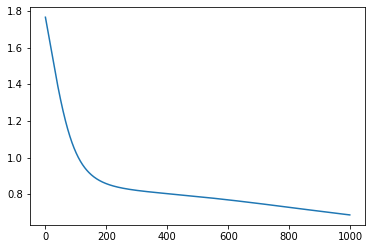

In [6]:
plt.plot(errors)
plt.show()

In [7]:
V = [[1,1],[1,1]]
W =[1,1]

learning_rate = 0.05
iter = 0
error = 0  
errors = []

while iter < 1000 and error > 0.02 or error == 0:
  error = 0
  for index,row in XOR.iterrows():
    input_hidden = []
    hidden_out = []
    input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
    input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])
    hidden_out.append(sigmoid(input_hidden[0]))
    hidden_out.append(sigmoid(input_hidden[1]))
    output = sigmoid(hidden_out[0]*W[0]+(hidden_out[1]*W[1]))
    ERROR = row['OUT'] - output
    delta1 = ((ERROR) * output *(1-output))
    delta2 = [delta1*W[0]*hidden_out[0]*(1-hidden_out[0]),delta1*W[1]*hidden_out[1]*(1-hidden_out[1])]
    for i in range(len(W)):
      W[i] += learning_rate*delta1*hidden_out[i]
    print(V)
    V[0][0] += learning_rate*delta2[0]*row['A'] 
    V[0][1] += learning_rate*delta2[1]*row['A']
    V[1][0] += learning_rate*delta2[0]*row['B']
    V[1][1] += learning_rate*delta2[1]*row['B'] 
    error += ERROR**2
  errors.append(error)
  iter+=1

[[1, 1], [1, 1]]
[[1.0, 1.0], [1.0, 1.0]]
[[1.0, 1.0], [1.0002836272654412, 1.0002836272654412]]
[[1.0002832993763058, 1.0002832993763058], [1.0002836272654412, 1.0002836272654412]]
[[0.9997231185038226, 0.9997231185038226], [0.999723446392958, 0.999723446392958]]
[[0.9997231185038226, 0.9997231185038226], [0.999723446392958, 0.999723446392958]]
[[0.9997231185038226, 0.9997231185038226], [1.0000090671298345, 1.0000090671298345]]
[[1.00000840866183, 1.00000840866183], [1.0000090671298345, 1.0000090671298345]]
[[0.9994480367156706, 0.9994480367156706], [0.9994486951836752, 0.9994486951836752]]
[[0.9994480367156706, 0.9994480367156706], [0.9994486951836752, 0.9994486951836752]]
[[0.9994480367156706, 0.9994480367156706], [0.9997363014611811, 0.9997363014611811]]
[[0.9997353098205489, 0.9997353098205489], [0.9997363014611811, 0.9997363014611811]]
[[0.9991747962758075, 0.9991747962758075], [0.9991757879164397, 0.9991757879164397]]
[[0.9991747962758075, 0.9991747962758075], [0.999175787916439

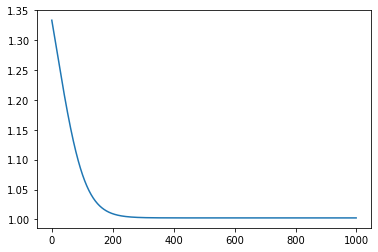

In [8]:
plt.plot(errors)
plt.show()

In [9]:
V = [[1,1],[1,1]]
W = [[1,1],[1,1]]

learning_rate = 0.05
iter = 0
error = 0  
errors = []
input_hidden = []
hidden_out = []
while iter < 1000 and error > 0.02 or error == 0:
  error = 0
  for index,row in AND.iterrows():
    O_array = [not(row['OUT']),row['OUT']]
    input_hidden = []
    hidden_out = []
    output = []
    ERROR = []
    input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
    input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])
    hidden_out.append(sigmoid(input_hidden[0]))
    hidden_out.append(sigmoid(input_hidden[1]))
    output.append(sigmoid(hidden_out[0]*W[0][0]+ hidden_out[1]*W[1][0]))
    output.append(sigmoid(hidden_out[1]*W[1][1]+ hidden_out[0]*W[0][1]))
    ERROR.append(O_array[0] - output[0])
    ERROR.append(O_array[1] - output[1])
    delta1 = [(ERROR[0]) * output[0] *(1-output[0]), (ERROR[1]) * output[1] *(1-output[1])]
    delta2 = [(delta1[0]*W[0][0] + delta1[1]*W[0][1])*hidden_out[0]*(1-hidden_out[0]),(delta1[0]*W[1][0] + delta1[1]*W[1][1])*hidden_out[1]*(1-hidden_out[1])]
    W[0][0] += learning_rate*delta1[0]*hidden_out[0] 
    W[0][1] += learning_rate*delta1[1]*hidden_out[0]
    W[1][0] += learning_rate*delta1[0]*hidden_out[1]
    W[1][1] += learning_rate*delta1[1]*hidden_out[1] 
    V[0][0] += learning_rate*delta2[0]*row['A'] 
    V[0][1] += learning_rate*delta2[1]*row['A']
    V[1][0] += learning_rate*delta2[0]*row['B']
    V[1][1] += learning_rate*delta2[1]*row['B'] 
    error += (ERROR[0]**2+ERROR[1]**2)
  errors.append(error)
  iter+=1

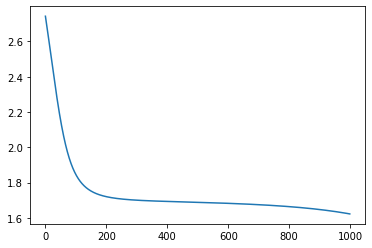

In [10]:
plt.plot(errors)
plt.show()

In [11]:
MLP = MLPClassifier(hidden_layer_sizes=2,activation='logistic',solver='sgd',learning_rate_init=0.02,max_iter=1000)

In [12]:
X_AND = AND[['A','B']]
Y_AND = AND['OUT']
X_XOR = XOR[['A','B']]
Y_XOR = XOR['OUT']

In [13]:
MLP.fit(X_AND,Y_AND)
MLP.score(X_AND,Y_AND)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


1.0

In [14]:
MLP.predict([[1,1]])

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
MLP = MLPClassifier(hidden_layer_sizes=[8],activation='logistic',solver='sgd',learning_rate_init=0.2,max_iter=1000)
MLP.fit(X_XOR,Y_XOR)
MLP.score(X_XOR,Y_XOR)

0.75

In [16]:
MLP.predict(X_XOR)

array([0, 0, 1, 0], dtype=int64)

In [17]:
import pandas as pd
df_train = pd.read_csv(r"C:\Users\user\Downloads\lab3\lab3\data\train_data.csv")
df_test = pd.read_csv(r"C:\Users\user\Downloads\lab3\lab3\data\test_data.csv")

df_train.drop(['Timestamp'], axis=1, inplace=True)
df_test.drop(['Timestamp'], axis=1, inplace=True)

df_train['Class']=df_train['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])
df_test['Class']=df_test['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])

In [18]:
X_train = df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
X_test = df_test[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y_train = df_train[['Class']].values.ravel()
y_test = df_test[['Class']].values.ravel()

In [19]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=5, max_iter=120000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score( y_test, y_pred))

Accuracy = 0.7551880674448768
